Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [1]:
NAME = "Rohan Chatterjee,2008264"
COLLABORATORS = ""

---

Fill in the cell above to provide us with your name and student number, like

NAME = "Adam Smith, #student number#"

where you replace "#student number#" with your ... (very good!)

Unfortunately, you are not allowed to work with "COLLABORATORS" in this exam.

# exam September 7th, 2018

With this python part of the exam you can earn at max. 4 points.




In the first cell of the notebook, give us your name and student number in the way indicated above. 

Fill in the notebook (see below for code cells and text cells that you need to fill in).

If you look at the menus above (File, Edit, View etc.), there is one called "Cell". If you click on this, you can change the "Cell Type". Choose "Code" when you are typing python or R code. Choose "Markdown" when you are typing, well, markdown.

When you finish the notebook, make sure that you **save it with the output of your code included**. 

Then put it on github, e.g. by dragging it onto github (see instructions below). 

Finally, add a link to your README file with the name of this exam: "Exam September 7, 2018".



## Demand and equilibrium

We start by importing the usual libraries.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy import optimize
%matplotlib inline

#### a) [1 point] Explain in words what the following code does. Which property of booleans in python do we use for this to work?

[hint: copy-paste part of the code in a cell to evaluate each step separately]

In [2]:
np.sum(np.array([1,2,3,4,5,6,7,8])>3)/len(np.array([1,2,3,4,5,6,7,8])>3)

0.625

In [5]:
print(np.array([1,2,3,4,5,6,7,8])>3) #Checking What The code inside np.sum does
print(np.array([1,2,3,4,5,6,7,8])>3)#Checking What The code inside len does
print(len(np.array([1,2,3,4,5,6,7,8])>3)) #Checking What The code len does
print(np.sum(np.array([1,2,3,4,5,6,7,8])>3))

[False False False  True  True  True  True  True]
[False False False  True  True  True  True  True]
8
5


YOUR ANSWER HERE -  The property of booleans treating True as 1 and False as 0 is being used here.The code inside np.sum is a boolean, which returns True if a number in the array is greater than 3. Since there are 5 True's(the rest are false hence 0) , python will add them up as it is inside np.sum, giving us 5. 

The code in the denominator, has the same array the numerator has, only this time, it is inside len. Len simply counts the number of elements in the array, so it will return 8 as there are 8 elements. It does not distinguish between True or False or 0 and 1.

In the end, we get 5/8 which is 0.625

Consider a market with 1000 consumers. Each consumer is willing to buy either 1 or 0 units of the product in this market. If the consumer does not buy, her utility equals 0.

The vector of valuations of all 1000 consumers in the market is given by the vector `vector_utilities` below.


In [7]:
N_consumers = 1000
vector_utilities = np.random.normal(10,3,size=N_consumers)

In [11]:
print(vector_utilities)

[ 8.15201032 13.31433886  9.20016552 10.85217428  9.86018406 11.39765522
 13.77332969 13.64739979 11.87881383  6.49734721  3.36669577  5.58935345
 10.14100027 10.89652781  7.72165989  8.03557952  8.5450961  17.79920163
 15.05577003  4.56166468 11.23858739 11.16543089  9.69801293  8.40625421
 10.1327841  11.52793759 15.54466961 14.44619391  2.3047824  13.65170409
 10.51263198  7.3019774  11.96175937  9.56464932 10.25548306 12.51435798
  7.94865902  7.68636944  3.58592529 11.90434211  8.04038266 11.40336349
 11.4215558   7.88109165  7.89619743 11.70230362 13.18082131 14.26174356
 14.08353904 13.04667615  6.0091119  13.75537441 10.8944026   8.04432292
 13.40622494 15.87941125 11.42801315  7.62334072 10.54627231  5.13840744
 13.02536374  9.23085445  6.36025001  8.83587108  5.57039365 11.02824564
 13.35765146  8.90416784 11.69077669 12.00375838  6.49509999  6.96743833
  6.37526989 11.35772324 12.96885274  9.46915607 13.2466778   9.41582704
 12.82280022 11.17843336 11.79315211  6.44262046  6

#### b) [0.5 points] Explain what the code `np.random.normal` does.

YOUR ANSWER HERE - np.random.normal draws random numbers from the normal distribution, that is from the probability density function of the bell shaped curve.[Note-- all bell shaped curves are not normally distributed]

#### c) [1. point] (i) Create a histogram of the vector `vector_utilities`. (ii) Make sure that we have relative frequencies (not absolute numbers) on the vertical axis [hint: you can use google to figure out how this works] (iii) Put the label 'utility' on the horizontal axis and the label 'frequency' on the vertical axis.

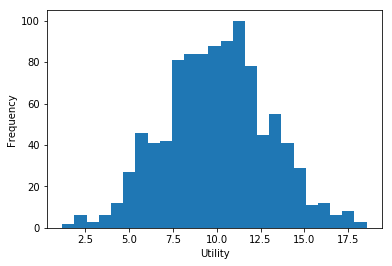

In [23]:

plt.hist(vector_utilities, bins = 25, orientation='vertical') #code to make histogram
plt.ylabel('Frequency') #naming vertical axis
plt.xlabel('Utility') #naming horizontal axis
plt.show()

#### d) [0.5 points] Complete the following function which gives for each price `p` the demand (number of consumers willing to buy at price `p`.

[hint 1: what must be true for an element in `vector_utilities` for this consumer to buy the product?]

[hint 2: part of what you learned under a) may be useful here]

In [7]:
def demand(p):
    a=[]
    for i in vector_utilities :  
         if  i-p>0 :# people will buy the good only if utility is higher than price
                a.append(i)
    return len (a)
                
        
            
demand(10.71) #checking the function.

390

#### e) [0.5 points] Plot this demand function. Recall that economists tend to put quantity on the horizontal axis and price on the vertical axis.

[hint: if for some reason you could not solve d) work with the following --incorrect-- demand function:

`def demand(p):
   return 1000-p`

to finish the exam.]

Text(0,0.5,'Price')

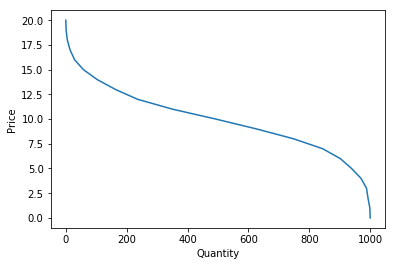

In [8]:
e= np.arange(0,21,1)
plt.plot([demand(q) for q in e],e)
plt.xlabel('Quantity')
plt.ylabel('Price')

Assume that there is a fixed supply of 400 units of this product. Consider the following function `excess demand`.

In [9]:
supply = 400
def excess_demand(p):
    return demand(p)-supply

#### f) [0.5 points] Use a numerical solver to solve for the equilibrium price. Use the figure under e) to give a reasonable starting point for the numerical solver.

[hint: what must be true for `excess_demand` at the equilibrium price?]

In [11]:
optimize.fsolve(lambda p : excess_demand(p),11) #fsolve finds the zeros of an equation and  excess_demand must be 0 at equilibrium price

array([10.62932481])

## Github

After you have finished, we need to upload this notebook on github.

Instructions on how to upload this on github can be found [on this page](http://janboone.github.io/programming-for-economists/github.html). This page has two screencasts: one shows how to drag the notebook onto your github page, the other shows how you can use the command line to upload your notebook.


Remember to update the README file in your repository to include a link to this notebook on github.


The links that you should post start with “github.com/” and are NOT of the form “http://localhost”. Make sure you test your links after uploading.